<div class="alert alert-block alert-success">
    
 
# ⚖️ Data Scaling Methods
    
 👨‍🏫 **Vikesh K**      
 📓 **Lab-06**
  

</div>

 💡  <span style='font-family:Georgia'>
    <font color= darkred> **"The secret to getting ahead is getting started"**
    </font> 💡   

## 📝Lab Agenda

* Importance of Scaling
* How to do Scaling and types
* Scaling comparision

   
## Importance of Scaling    
    
**Scaling is an important pre-processing step for machine learning because it helps to normalize the input data so that it can be more easily compared and processed by the learning algorithm. Here are some reasons why scaling is important**:

* **Different scales**: Features in the input data may have different scales, i.e., some features may have larger numerical values than others. This can cause the learning algorithm to place undue importance on features with larger numerical values, even if they are not actually more important for the problem at hand. Scaling the features to a common scale can help prevent this.

* **Convergence**: Many machine learning algorithms use some form of gradient descent to optimize the model parameters. If the input features are not scaled, the optimization process may take longer to converge or may not converge at all. This is because features with large numerical values may cause the gradients to be too large or too small, making it difficult to find the optimal parameter values.

* **Distance-based algorithms**: Some machine learning algorithms, such as k-nearest neighbors and clustering, are based on distances between data points. If the input features are not scaled, the distance calculations may be dominated by features with larger numerical values, leading to biased results.

* **Regularization**: Regularization is a technique used to prevent overfitting in machine learning models. Some regularization techniques, such as L1 regularization, are based on the absolute values of the model parameters. If the input features are not scaled, the regularization may be biased towards features with larger numerical values.

    
Overall, scaling is important for machine learning because it can help improve the performance and stability of the learning algorithm, reduce the training time, and ensure that the model is making meaningful comparisons between the input features


## Importing Modules and Data

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

```{note}
**We will use sample columns of Titanic data to further understand the scaling and how it impacts the data**
```

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/vkoul/data/main/misc/titanic.csv')

In [77]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## How to do Scaling

```{note}

**For illustration, we will focus on `Age` and `Fare` columns for this task. Idea is to compare the distributions before and after the scaling**

```

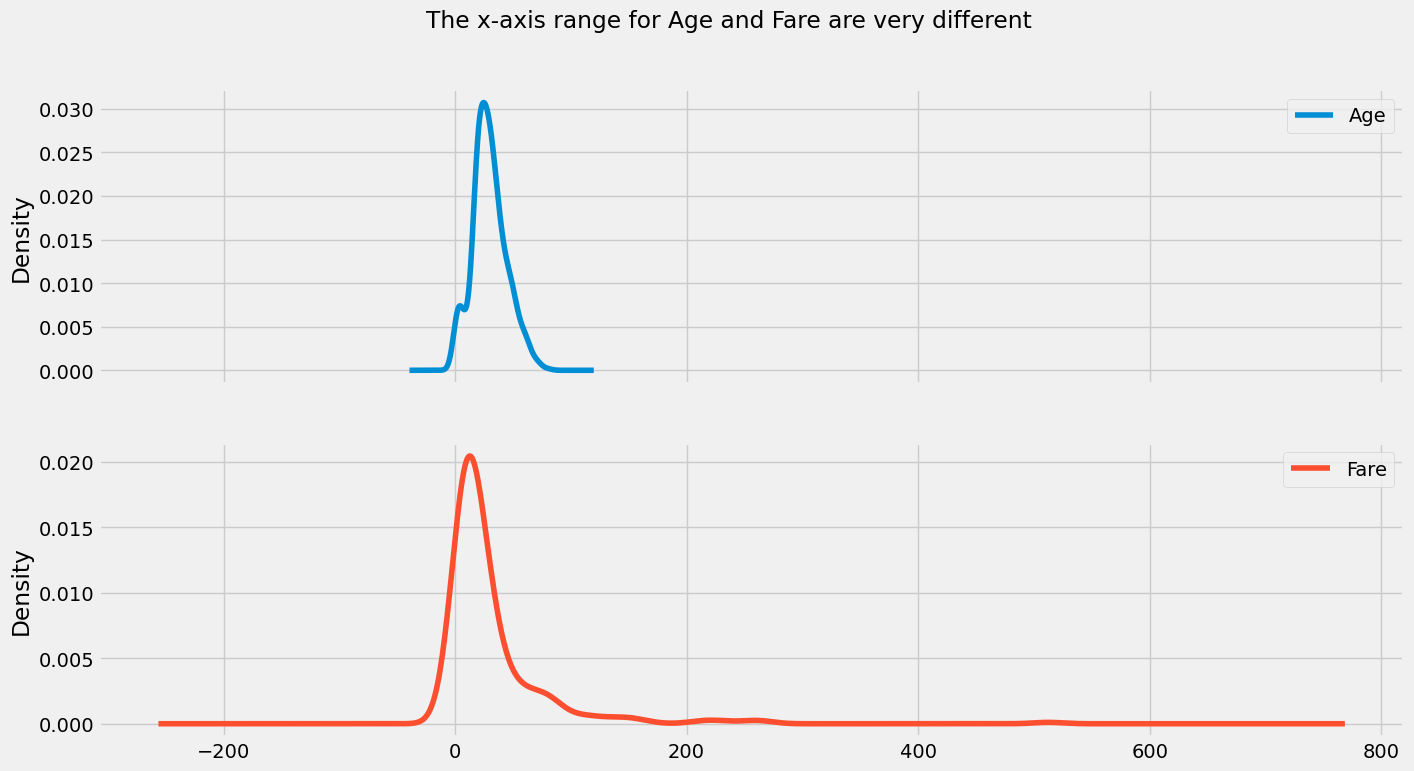

In [78]:
df[['Age', "Fare"]].plot(kind = 'kde', subplots = True, title = "The x-axis range for Age and Fare are very different", figsize= (15,8));

**The two common scaling techniques are `Min-Max` scaling and `Standard Scaling`. We will quickly use the example of `Standard Scaling` and see its impact on the variables**

In [79]:
df2 = df.copy() # creating a copy, so that original dataset remains untouched

In [80]:
from sklearn.preprocessing import StandardScaler

# call scaler
ss_scaler = StandardScaler()

# fit the scaler
df2[['Age', 'Fare']] = ss_scaler.fit_transform(df2[['Age', 'Fare']])

In [81]:
df2[['Age', "Fare"]].describe()

,Age,Fare
count,7.140000e+02,8.910000e+02
mean,2.388379e-16,3.987333e-18
std,1.000701e+00,1.000562e+00
min,-2.016979e+00,-6.484217e-01
25%,-6.595416e-01,-4.891482e-01
50%,-1.170488e-01,-3.573909e-01
75%,5.718310e-01,-2.424635e-02
max,3.465126e+00,9.667167e+00


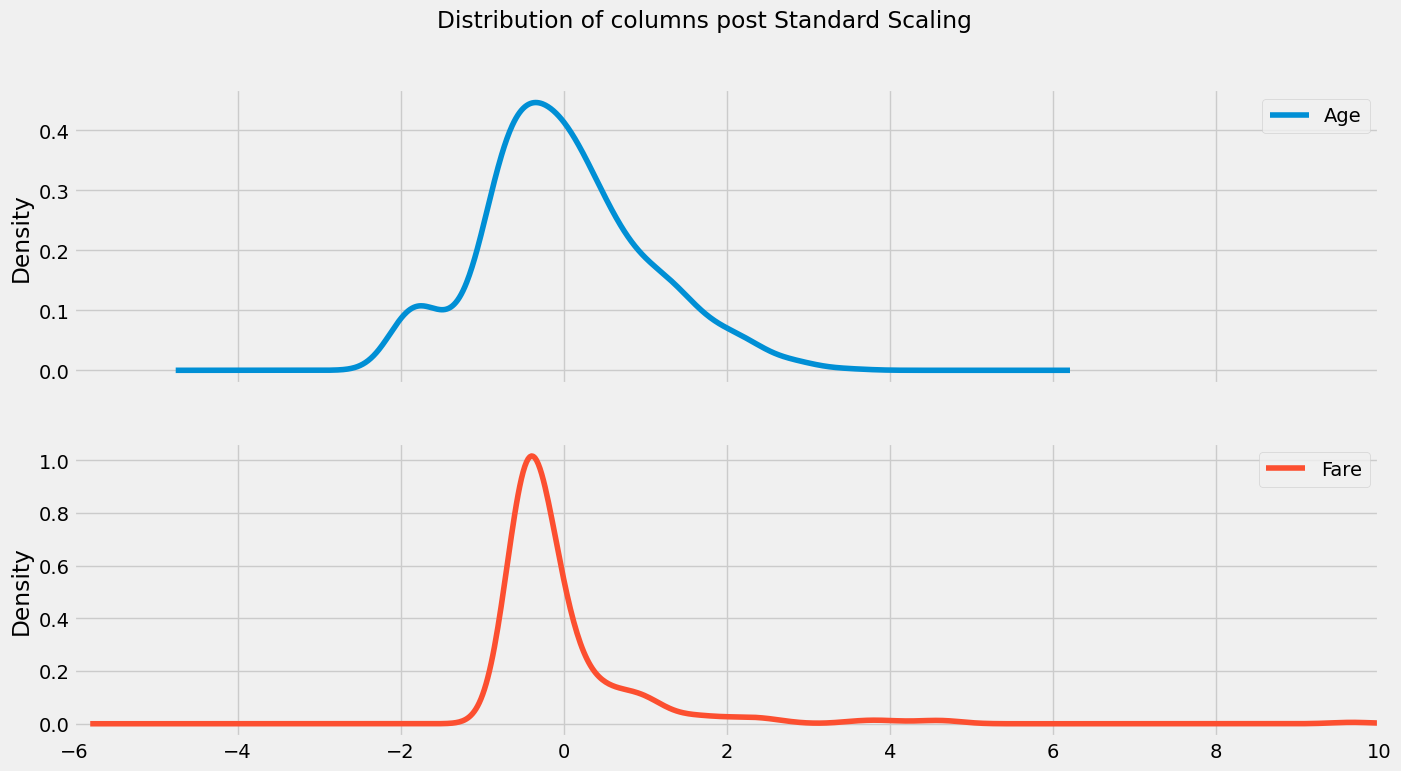

In [82]:
df2[['Age', "Fare"]].plot(kind = 'kde', subplots = True, xlim = (-6,10), title = "Distribution of columns post Standard Scaling", figsize=(15,8));

In [83]:
df3 = df.copy()

**Min-max Scaling**

In [84]:
from sklearn.preprocessing import MinMaxScaler

# call scaler
mm_scaler = MinMaxScaler()

# fit the scaler
df3[['Age', 'Fare']] = mm_scaler.fit_transform(df3[['Age', 'Fare']])

In [85]:
df3[['Age', "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,0.367921,0.062858
std,0.182540,0.096995
min,0.000000,0.000000
25%,0.247612,0.015440
50%,0.346569,0.028213
75%,0.472229,0.060508
max,1.000000,1.000000


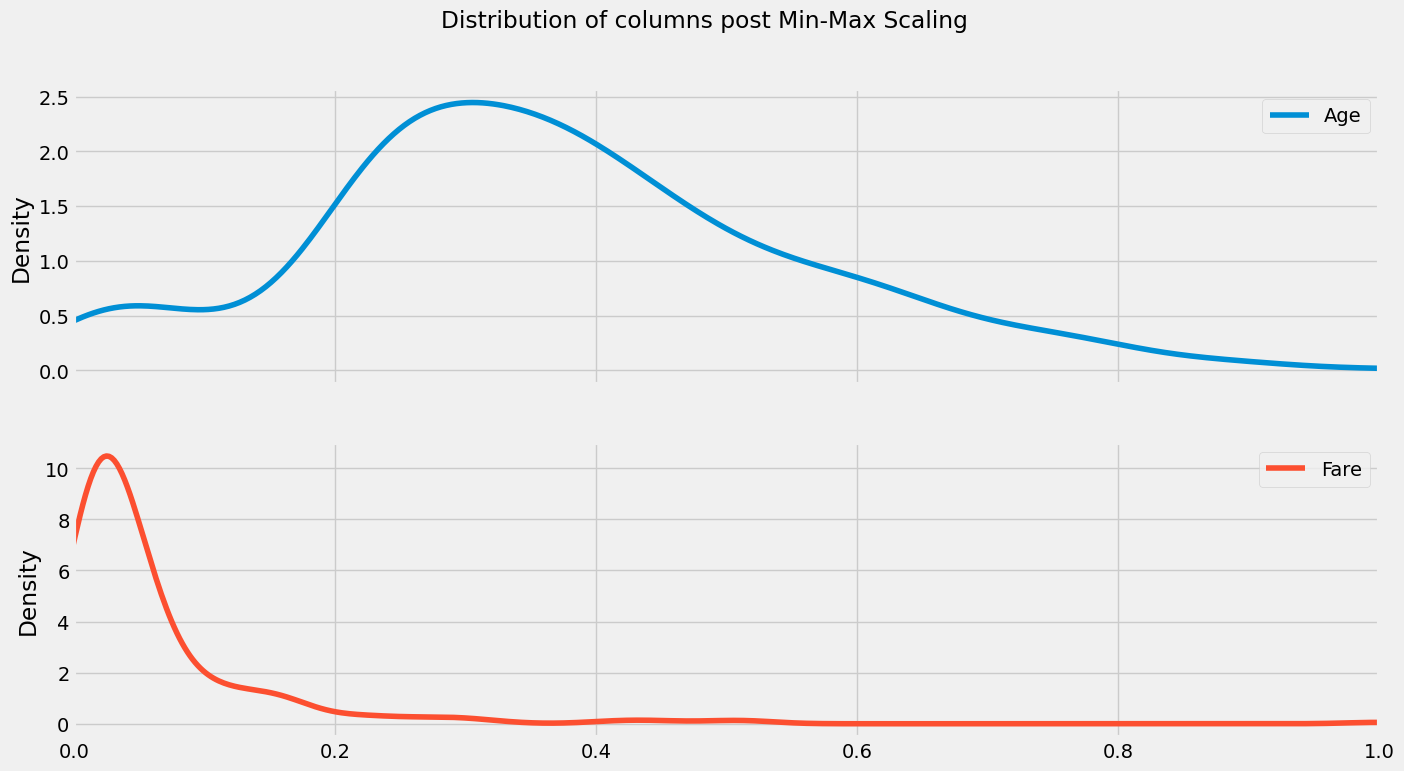

In [86]:
df3[['Age', "Fare"]].plot(kind = 'kde', subplots = True, title = "Distribution of columns post Min-Max Scaling", figsize= (15,8), xlim= (0,1));

## Comparisions between the two methods

**We will take each of the column, `Age` and `Fare` and individually apply all the techniques and make a comparision between them**

### Age Analysis

In [87]:
age = df[['Age']].dropna()

#### [Min Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

Min-Max normalization is a technique used to rescale a feature in the data to a specific range, such as [0, 1]. The formula for min-max normalization is as follows:

`X_norm = (X - X_min) / (X_max - X_min)`

where X is the original feature, X_min is the minimum value for that feature, X_max is the maximum value for that feature, and X_norm is the normalized feature.

This formula transforms each feature in the data to a new scale, based on the minimum and maximum values for that feature. The resulting normalized feature will have values in the range [0, 1], with 0 representing the minimum value for that feature and 1 representing the maximum value.

It is important to note that min-max normalization should only be used when the data is skewed or has a large range. If the data is not skewed and has a Gaussian distribution, it may be more appropriate to use a technique such as standard scaling, which transforms the data so that it has a mean of 0 and a standard deviation of 1.

In [88]:
from sklearn.preprocessing import MinMaxScaler

# call scaler
mm_scaler = MinMaxScaler()

# fit the scaler
age['mm_scaled'] = mm_scaler.fit_transform(age)

#### [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

Standard scaling, also known as standardization, is a technique used in machine learning to transform a feature to have a mean of 0 and a standard deviation of 1. This is useful because it allows features with different units of measurement to be compared on the same scale.

The formula for standard scaling is as follows:

`X_std = (X - X_mean) / X_std`

where X is the original feature, X_mean is the mean of that feature, X_std is the standard deviation of that feature, and X_std is the standardized feature.

In [89]:
from sklearn.preprocessing import StandardScaler

# call scaler
ss_scaler = StandardScaler()

# fit the scaler
age['ss_scaled'] = ss_scaler.fit_transform(age[['Age']])

In [90]:
age.head()

,Age,mm_scaled,ss_scaled
0,22.0,0.271174,-0.530377
1,38.0,0.472229,0.571831
2,26.0,0.321438,-0.254825
3,35.0,0.434531,0.365167
4,35.0,0.434531,0.365167


In [91]:
age.describe()

,Age,mm_scaled,ss_scaled
count,714.000000,714.000000,7.140000e+02
mean,29.699118,0.367921,2.338621e-16
std,14.526497,0.182540,1.000701e+00
min,0.420000,0.000000,-2.016979e+00
25%,20.125000,0.247612,-6.595416e-01
50%,28.000000,0.346569,-1.170488e-01
75%,38.000000,0.472229,5.718310e-01
max,80.000000,1.000000,3.465126e+00


Age


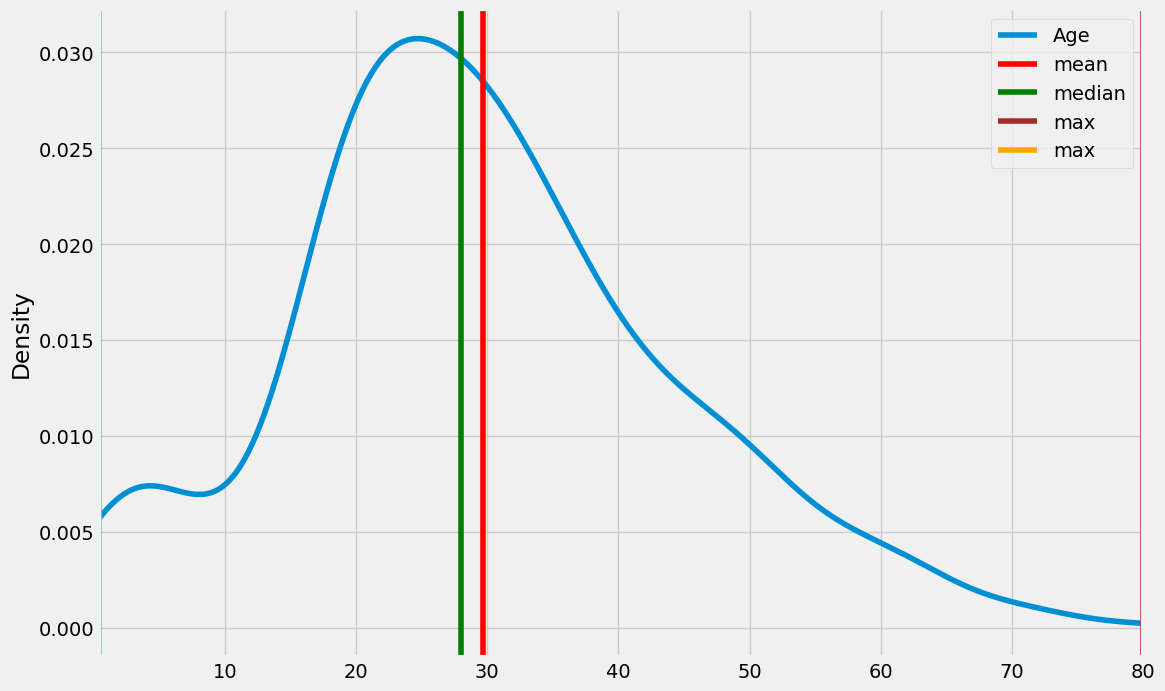

mm_scaled


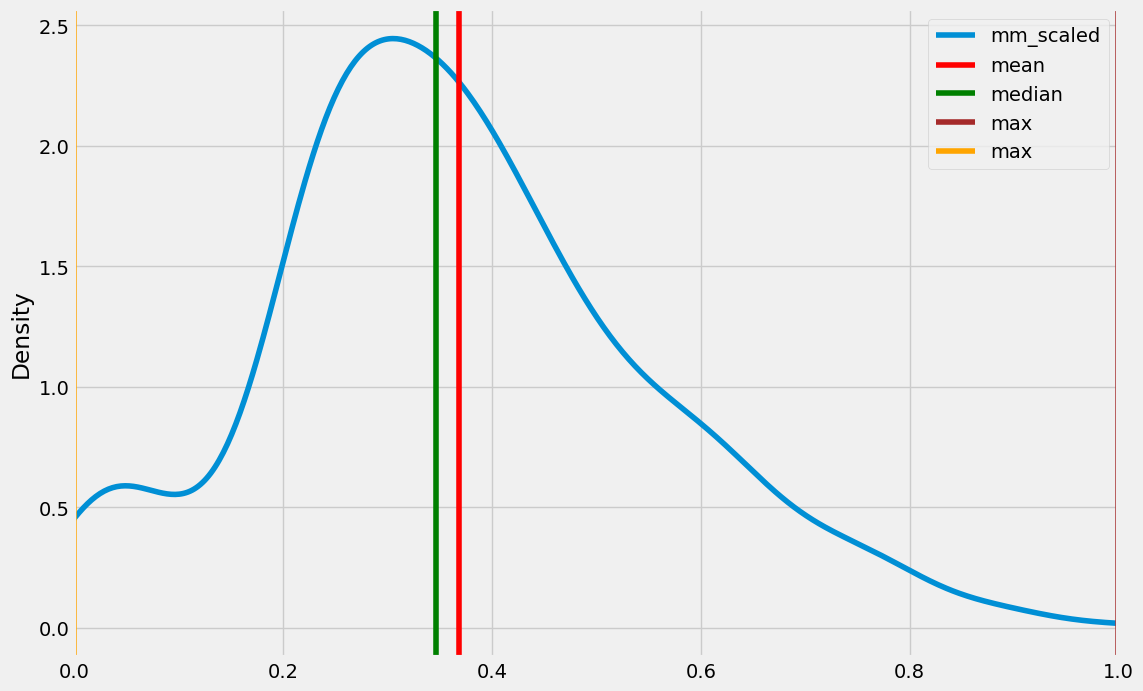

ss_scaled


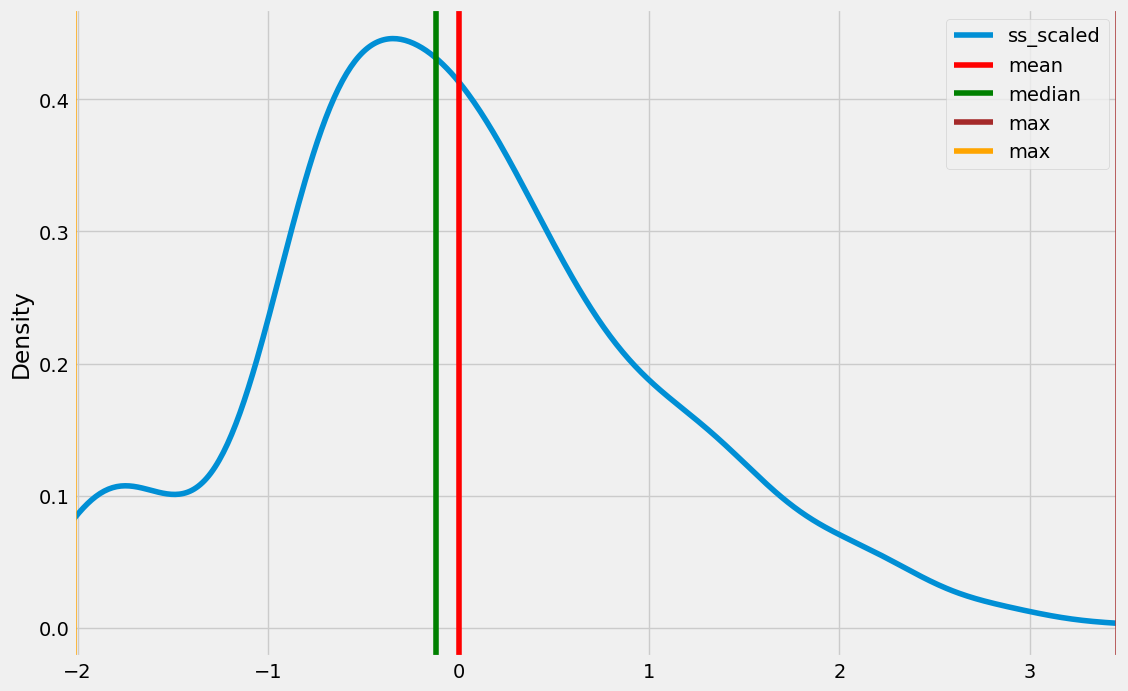

In [92]:
for cols in age.columns:
    print(cols)
    age[cols].plot(kind = 'kde', figsize = (12, 8), xlim = (age[cols].min(), age[cols].max()))
    plt.axvline(age[cols].mean(), color = 'red', label = 'mean')
    plt.axvline(age[cols].median(), color = 'green', label = 'median')
    plt.axvline(age[cols].max(), color = 'brown', label = 'max')
    plt.axvline(age[cols].min(), color = 'orange', label = 'max')
    plt.legend()
    plt.show()

### Fare Analysis
The column is skewed

In [93]:
fare = df[['Fare']]

In [94]:
from sklearn.preprocessing import MinMaxScaler

# call scaler
mm_scaler = MinMaxScaler()

# fit the scaler
fare['mm_scaled'] = mm_scaler.fit_transform(fare)

In [95]:
from sklearn.preprocessing import StandardScaler

# call scaler
ss_scaler = StandardScaler()

# fit the scaler
fare['ss_scaled'] = ss_scaler.fit_transform(fare[['Fare']])

In [96]:
fare.describe()

,Fare,mm_scaled,ss_scaled
count,891.000000,891.000000,8.910000e+02
mean,32.204208,0.062858,3.987333e-18
std,49.693429,0.096995,1.000562e+00
min,0.000000,0.000000,-6.484217e-01
25%,7.910400,0.015440,-4.891482e-01
50%,14.454200,0.028213,-3.573909e-01
75%,31.000000,0.060508,-2.424635e-02
max,512.329200,1.000000,9.667167e+00


Fare


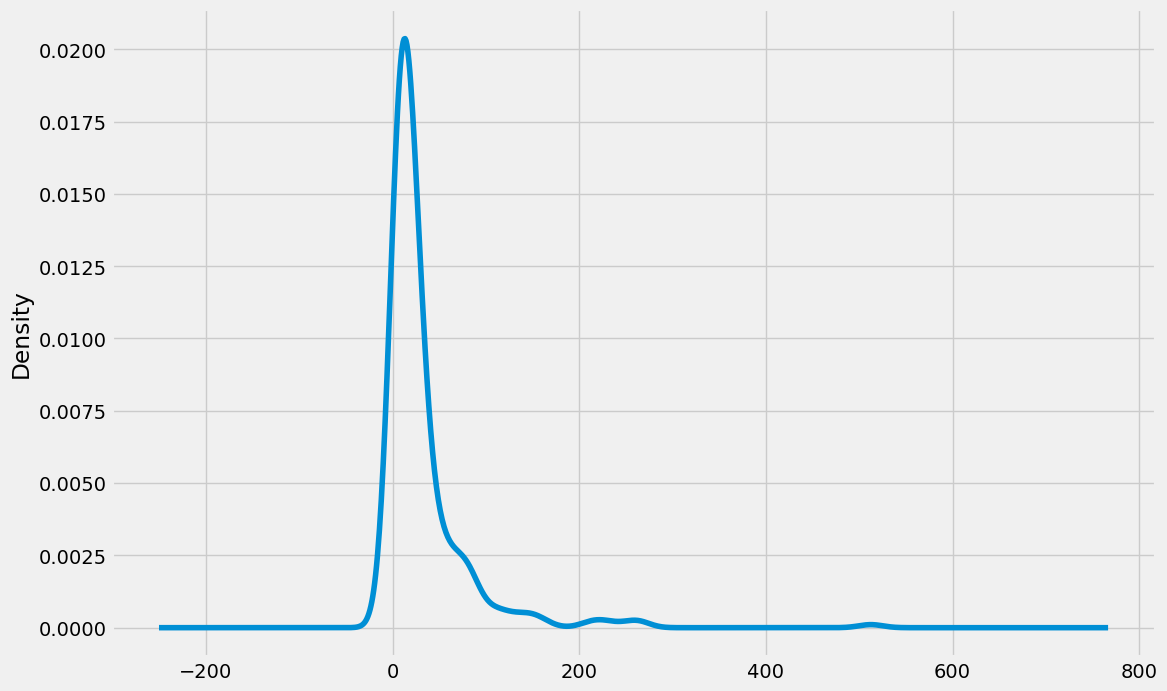

mm_scaled


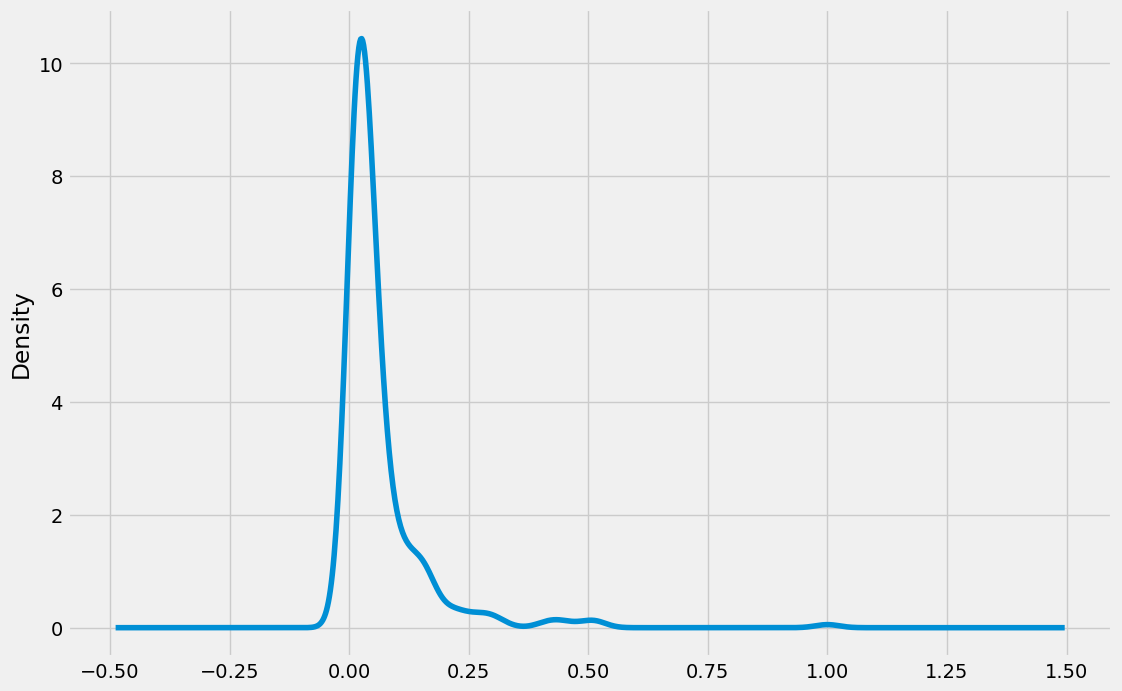

ss_scaled


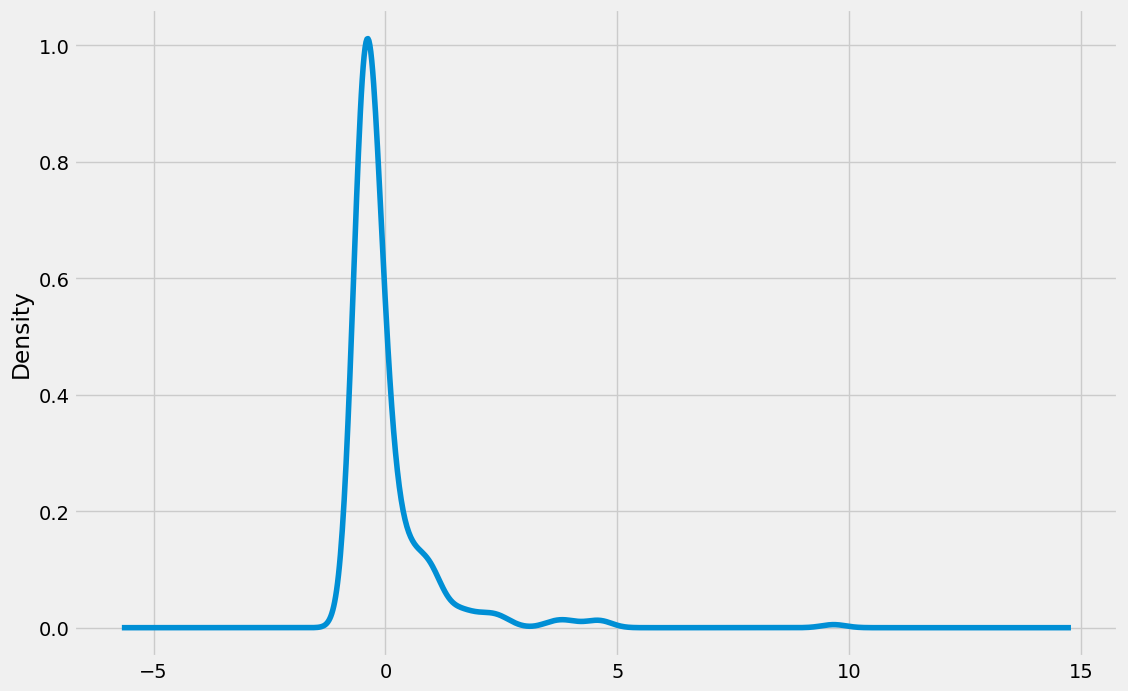

In [97]:
for cols in fare.columns:
    print(cols)
    fare.query('Fare >0')[cols].plot(kind = 'kde', figsize = (12, 8))
    plt.show()